# Open Card Sort with Hierarchal Clustering

## Project Background

The goal of conducting this open card sort project is to discover how potential taxpayers sort and categorize 40 tax-related features that are likely to be shown on future tax filing website. By understanding how participants group these features and name the group, the client will be able to create a user-friendly and easy-navigating website that enhances user experience. 

## Research Questions 
1. What groups were commonly formed by participants? What were the differences and similarities?
2. What groups were not commonly formed?
3. How are these common groups named? What were the differences and similarities?
4. What groups did not have common names?
5. What cards were commonly grouped together? What were the differences and similarities?
6. What cards were ouliers in terms of their placement?
7. Were there groups with similar names, but those groups contained very different cards?
8. Were there groups with very similar cards, but the group names were radically different?
9. Were there any category/card groupings that were starkly different than the rest?
10. How many categories did users form when performing the test?  (Mean, median, mode, range)
11. What level of frequency was each category formed? (Ex. How many people formed the 'Profile', 'Payments', and/or 'Forms/documents' category?)
12. What was the level of consensus on certain categories?
13. How many cards are placed in each category? (Mean, median, mode, range)
14. What differences, if any, were there between those who formed 5+ groups, and those who formed 4 or less?

## Hierarchal Clustering
https://www.youtube.com/watch?v=7xHsRkOdVwo&t=3s&ab_channel=StatQuestwithJoshStarmer
Hierarchical clustering is very common in biology and lends itself nicely to visualizing clusters. It can also help the user decide on an appropriate number of clusters. 

Like most clustering algorithms, Hierarchical Clustering simply relies on measuring which data points are most "similar" to other data points. "Similarity" is defined by choosing a distance metric. 

## Why use Hierarchical Clustering?
- Easy to understand and visualize
- Helps users decide how many clusteres to choose.
- No necessary to choose cluster amount **before** running the algorithm. 

## How it works?
- Devides points into **potential** clusters : 
  - Agglomerative Approach(more common) : Each point begins as its own cluster, then clusters are joined


## What was done in this notebook
1. Data check 
- Found 1 mistyped rows - corrected 
    - Person 12 'Tax refund tracking' has duplicate entries
    - Person 12 'Tax Refund Tracking' is under 'P12 - Tax info', index 34
- Found all column names contain single or multiple space -- corrected in excel

2. Heat Map and Cluster Map

3. Exploratory Data Analysis
- Summary of the data
- Heatmap and clustermap
4. Clustering with cluster Map Results
5. Exploring Number of Clusters with Dandrograms
- Dendrogram and cluster models 5,6,7,and 8
6. Model Determination and Cluster Analysis
- Determine to adopt 5 clusters model
- Display the final table of clustering
- Display a table of cards should be manually assigned with qualitative research

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',None)

## The Data

In [3]:
df = pd.read_csv('Final_Card_Sort_After Probe.csv')
df.head()
# categories is the unique identifier, not useful for clustering purpose(drop later)

,Categories,Person,Tax Balance Details,Payment activity,Scheduled payments,Processed payments,"Make, Schedule, & Cancel a payment",Payment Plan Options,Notices and Letters,Tax Account Notifications,Power of attorney authorization requests,Tax information authorization requests,Tax return transcript authorization requests,Tax records,Tax Return Transcript,Your Name,Your Home Address,Email and password,Email notifications,Paperless settings,Secure two-way messaging,Live chat with IRS,Save multiple bank accounts,Validate bank account information,Update my address (foreign & domestic),View my audit status,Lien payoff calculator,Tax Refund Tracking,Revise payment plans,Pre-assessed agreements,Pending installment agreement,Offer In Compromise (OIC) eligibility check,Offer In Compromise (OIC) payment options,Cancelled and returned payments,Track amended return,Request Identity Protection (IP) pin,Request Penalty abatement,Tax Withholding compliance self-correction tool,Self-report tax fraud,IRS forms,Apply for Eligible Tax Credits,See all submitted tax docs
0,P3 - Contact Us,P3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,P3 - Personal Information,P3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,P3 - Notification Settings,P3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,P3 - Payment Plans,P3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0
4,P3 - Records and Returns,P3,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Check Typos or Incorrect data

In [4]:
# There are 81 categories/rows and 40 cards after probe
print(f"# of rows : {len(df)}")
# Deduct categories/names and Person in columns
print(f"# of columns/cards : {len(df.columns)-2}")

# of rows : 81
# of columns/cards : 40


In [5]:
# There are no missing values
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Categories                                        81 non-null     object
 1   Person                                            81 non-null     object
 2   Tax Balance Details                               81 non-null     int64 
 3   Payment activity                                  81 non-null     int64 
 4   Scheduled payments                                81 non-null     int64 
 5   Processed payments                                81 non-null     int64 
 6   Make, Schedule, & Cancel a payment                81 non-null     int64 
 7   Payment Plan Options                              81 non-null     int64 
 8   Notices and Letters                               81 non-null     int64 
 9   Tax Account Notifications         

In [6]:
# There are 15 respondants
len(df['Person'].unique())

15

In [7]:
# Grouping all rows for each column per person
# All values should be 1 
# We can see Person 1 miss "OIC payment options" because it's 0 
# And Person 3 miss "Make,Schedule & Cancel payment" because it's 0 
data_check = df.groupby(by='Person').sum()
data_check

,Tax Balance Details,Payment activity,Scheduled payments,Processed payments,"Make, Schedule, & Cancel a payment",Payment Plan Options,Notices and Letters,Tax Account Notifications,Power of attorney authorization requests,Tax information authorization requests,Tax return transcript authorization requests,Tax records,Tax Return Transcript,Your Name,Your Home Address,Email and password,Email notifications,Paperless settings,Secure two-way messaging,Live chat with IRS,Save multiple bank accounts,Validate bank account information,Update my address (foreign & domestic),View my audit status,Lien payoff calculator,Tax Refund Tracking,Revise payment plans,Pre-assessed agreements,Pending installment agreement,Offer In Compromise (OIC) eligibility check,Offer In Compromise (OIC) payment options,Cancelled and returned payments,Track amended return,Request Identity Protection (IP) pin,Request Penalty abatement,Tax Withholding compliance self-correction tool,Self-report tax fraud,IRS forms,Apply for Eligible Tax Credits,See all submitted tax docs
Person,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P15,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P17,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P19,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
P20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


 **Mistakes in file :**
 - There are empty spaces in card names (reading error)
 - Person 12 has duplicate entries(Tax Refund Tracking)
 
 
 **Correcting mistakes in excel and saved as 'Final_Card_Sort_Before Probe_mistake_corrected.csv'**
 - Person 12 'Tax Refund Tracking' is under 'P12 - Tax info', index 34

In [8]:
# Read the corrected data
df = pd.read_csv('Final_Card_Sort_After Probe_corrected.csv')
df.head()

,Categories,Person,Tax Balance Details,Payment activity,Scheduled payments,Processed payments,"Make, Schedule, & Cancel a payment",Payment Plan Options,Notices and Letters,Tax Account Notifications,Power of attorney authorization requests,Tax information authorization requests,Tax return transcript authorization requests,Tax records,Tax Return Transcript,Your Name,Your Home Address,Email and password,Email notifications,Paperless settings,Secure two-way messaging,Live chat with IRS,Save multiple bank accounts,Validate bank account information,Update my address (foreign & domestic),View my audit status,Lien payoff calculator,Tax Refund Tracking,Revise payment plans,Pre-assessed agreements,Pending installment agreement,Offer In Compromise (OIC) eligibility check,Offer In Compromise (OIC) payment options,Cancelled and returned payments,Track amended return,Request Identity Protection (IP) pin,Request Penalty abatement,Tax Withholding compliance self-correction tool,Self-report tax fraud,IRS forms,Apply for Eligible Tax Credits,See all submitted tax docs
0,P3 - Contact Us,P3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,P3 - Personal Information,P3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,P3 - Notification Settings,P3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,P3 - Payment Plans,P3,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0
4,P3 - Records and Returns,P3,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [9]:
# Check whether the mistake is corrected
# Should have one 1
df[df['Person'] == 'P12']['Tax Refund Tracking']

31    0
32    0
33    0
34    1
35    0
36    0
37    0
38    0
39    0
40    0
Name: Tax Refund Tracking, dtype: int64

In [10]:
# df.columns to check column names
# drop the first two columns since they are not useful in clustering analysis
cdf = df.drop(["Categories","Person"],axis = 1)
len(cdf.columns)

40

## Exploratory Data Analysis
### Summary statistic
#### How many categories did users form when performing the test? (Mean, median, mode, range)
- Mean : 5.4
- Median :5 
- Mode : 4,5,6,7 
- range : 2 - 10

In [11]:
# Showing numbers of categories created by all participants
categories = df['Person'].value_counts()
categories

P12    10
P9      7
P15     7
P18     7
P3      6
P13     6
P20     6
P5      5
P7      5
P24     5
P10     4
P11     4
P19     4
P21     3
P17     2
Name: Person, dtype: int64

In [12]:
categories.mean()

5.4

In [13]:
categories.median()

5.0

In [14]:
categories.mode()

0    4
1    5
2    6
3    7
Name: Person, dtype: int64

#### How many cards are placed in each category? (Mean, median, mode, range)
- Mean : 7.41
- Median :7 
- Mode : 7,8 
- range : 1 - 38

In [15]:
df.columns

Index(['Categories', 'Person', 'Tax Balance Details', 'Payment activity',
       'Scheduled payments', 'Processed payments',
       'Make, Schedule, & Cancel a payment', 'Payment Plan Options',
       'Notices and Letters', 'Tax Account Notifications',
       'Power of attorney authorization requests',
       'Tax information authorization requests',
       'Tax return transcript authorization requests', 'Tax records',
       'Tax Return Transcript', 'Your Name', 'Your Home Address',
       'Email and password', 'Email notifications', 'Paperless settings',
       'Secure two-way messaging', 'Live chat with IRS',
       'Save multiple bank accounts', 'Validate bank account information',
       'Update my address (foreign & domestic)', 'View my audit status',
       'Lien payoff calculator', 'Tax Refund Tracking', 'Revise payment plans',
       'Pre-assessed agreements', 'Pending installment agreement',
       'Offer In Compromise (OIC) eligibility check',
       'Offer In Compromise (OI

In [16]:
# Sum up all cards in each row/category
df['Total cards'] = df[['Tax Balance Details', 'Payment activity',
       'Scheduled payments', 'Processed payments',
       'Make, Schedule, & Cancel a payment', 'Payment Plan Options',
       'Notices and Letters', 'Tax Account Notifications',
       'Power of attorney authorization requests',
       'Tax information authorization requests',
       'Tax return transcript authorization requests', 'Tax records',
       'Tax Return Transcript', 'Your Name', 'Your Home Address',
       'Email and password', 'Email notifications', 'Paperless settings',
       'Secure two-way messaging', 'Live chat with IRS',
       'Save multiple bank accounts', 'Validate bank account information',
       'Update my address (foreign & domestic)', 'View my audit status',
       'Lien payoff calculator', 'Tax Refund Tracking', 'Revise payment plans',
       'Pre-assessed agreements', 'Pending installment agreement',
       'Offer In Compromise (OIC) eligibility check',
       'Offer In Compromise (OIC) payment options',
       'Cancelled and returned payments', 'Track amended return',
       'Request Identity Protection (IP) pin', 'Request Penalty abatement',
       'Tax Withholding compliance self-correction tool',
       'Self-report tax fraud', 'IRS forms', 'Apply for Eligible Tax Credits',
       'See all submitted tax docs']].sum(axis=1)

In [17]:
# Move Total cards to the front of columns(before cards and after Person)
col = df.pop('Total cards')
df.insert(2,col.name,col)

In [18]:
total_cards = df['Total cards']
card_mean = np.round(total_cards.mean(),2)
card_med = int(total_cards.median())
card_mode = total_cards.mode()
card_max = total_cards.max()
card_min = total_cards.min()

In [19]:
print(f"Total cards Mean : {card_mean}")
print(f"Total cards Median : {card_med}")
print(f"Total cards Mode : {card_mode}")
print(f"Total cards range : {card_min} - {card_max}")

Total cards Mean : 7.41
Total cards Median : 7
Total cards Mode : 0    7
1    8
Name: Total cards, dtype: int64
Total cards range : 1 - 38


In [20]:
# 7 and 8 cards are both mode
df['Total cards'].value_counts()

8     12
7     12
6      8
3      6
4      6
2      6
9      5
11     5
5      5
10     4
1      4
15     2
21     1
14     1
38     1
17     1
16     1
13     1
Name: Total cards, dtype: int64

### Heat Map
A heatmap is a graphical illustration of data where values are represented by colors

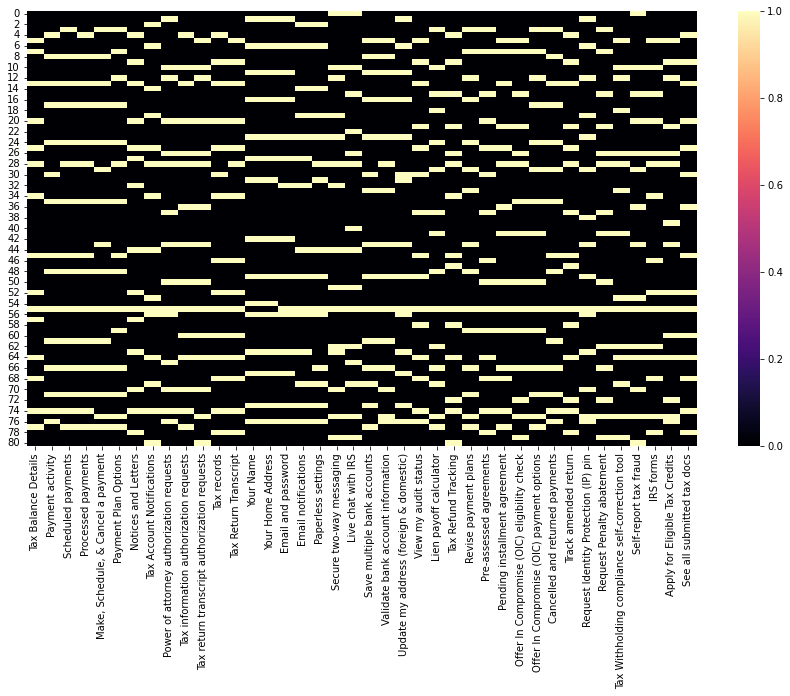

In [21]:
# Check the heatmap
# categorical features have only 2 colors(0 : black or 1 : light yellow)
# On the left,the number 0 to 80 is the index of rows (total 81 rows)
plt.figure(figsize=(15,8))
sns.heatmap(cdf,cmap='magma');

### Cluster Heatmap
A cluster heatmap is a heatmap where the rows and columns(depends on your settings) of a data matrix have been ordered according to the output from clustering. You can think it as a re-arranged heatmap that put similar rows or columns together. Clustering normally requires scaled/standardized data. Here, our data only contains 0 and 1, so scaling is not required. 

https://www.youtube.com/watch?v=oGDvD3wwXsU&ab_channel=TileStats

#### Ordered both by rows and columns

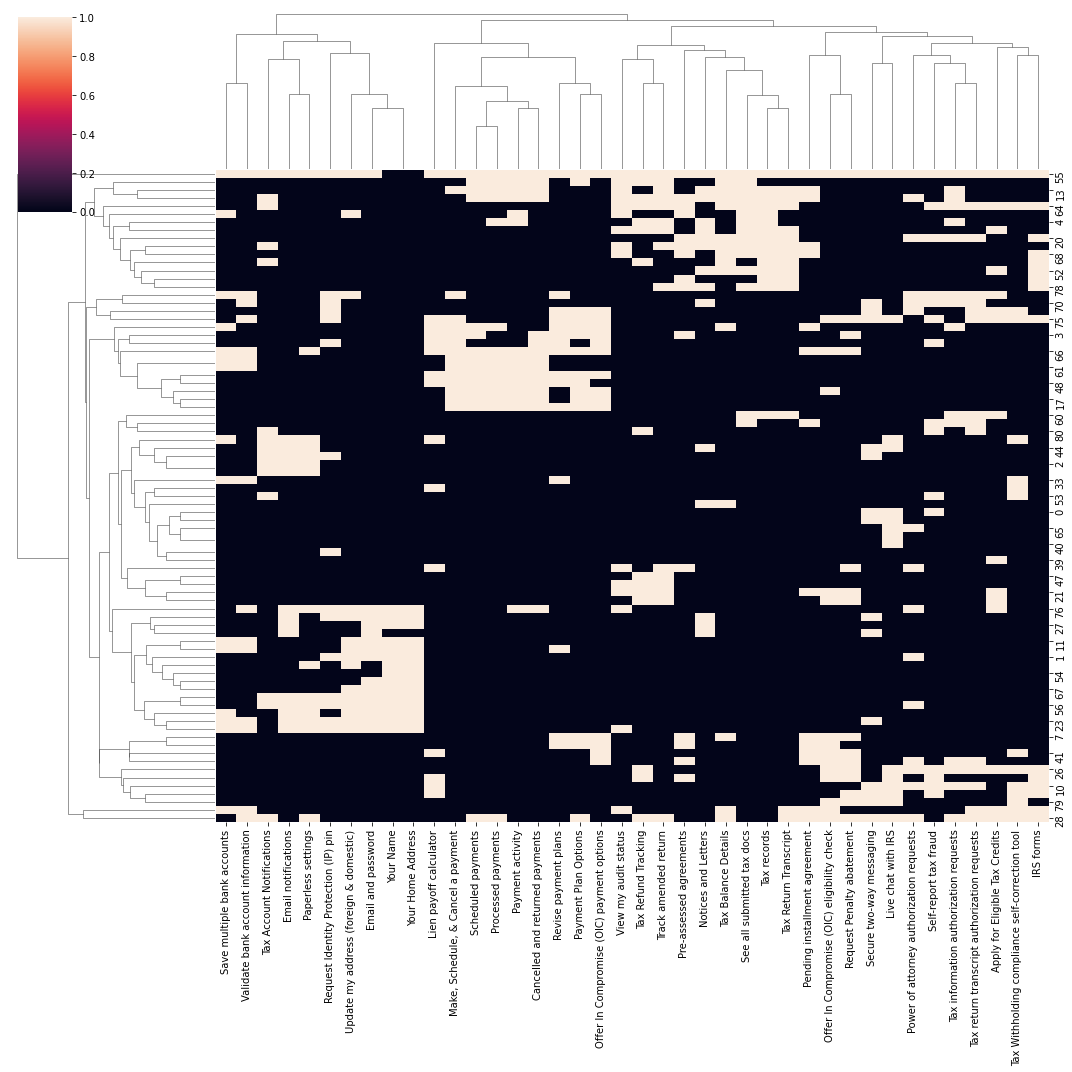

In [22]:
# By default, seaborn is going to runcluster by both rows and columns
# Be aware : large data set can't get the visualization like this
# If some card names are not shown, this can be modified by changing figsize =(15,15)
sns.clustermap(cdf,figsize=(15,15));

**Visual Clusters :**
<img src="After - Order by both.png" alt="Drawing" style="width: 800px;"/>

**There are 4 visual clusters :**
- Profile related
- Payment related
- Tax related
- Misc



- cluster 1 (profile related - 10 cards - exactly the same as the results before probing):
    - Save multiple bank accounts
    - Validate bank account information
    - Tax account notifications
    - Email notifications
    - Paperless settings
    - Request Identity Protection (IP) pin
    - Update my address (foreign & domestic)
    - Email and password
    - Your Name
    - Your Home Address
          
          
- cluster 2 (payment related - 9 cards - exactly the same as the results before probing): 

    - Lien payoff calculator
    - Make, Schedule, & Cancel a payment
    - Scheduled payments
    - Processed payments
    - Payment activity
    - Cancelled and returned payments
    - Revise payment plans
    - payment plan options
    - Offer In Compromise (OIC) payment options    
    
- cluster 3 (tax related - 9 cards):
    - View my audit status
    - Tax Refund Tracking
    - Track amended return
    - Pre-assessed agreements
    - Notices and Letters
    - Tax balance details
    - See all submitted tax docs
    - Tax Records
    - Tax Return Transcript
  
- cluster 4 (12 cards):

    - Pending installment agreement
    - Offer In Compromise (OIC) eligibility check 
    - Request Penalty abatement
    - Secure two-way messaging
    - Live chat with IRS
    - Power of attorney authorization requests
    - Self-report tax fraud
    - Tax information authorization requests
    - Tax return transcript authorization requests
    - Apply for eligible tax credit 
    - Tax withholding compliance self-correction tool
    - IRS forms
     

## Clustering (# of cluster = 3 or 4)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Let's create 3 or 4 clusters(based on what we see in cluster maps above) by machine and see the results. Later on, we will explore other cluster numbers. 


In [23]:
# We start off by 3 clusters(see the heatmap), this is arbitrary
from sklearn.cluster import AgglomerativeClustering

In [24]:
# Create models with 3 and 4 clusters
# If linkage is "ward", only "euclidean" is accepted
model_3 = AgglomerativeClustering(n_clusters=3)
model_4 = AgglomerativeClustering(n_clusters=4)

In [25]:
# Fit models
cluster_labels_3 = model_3.fit_predict(cdf)
cluster_labels_4 = model_4.fit_predict(cdf)

In [26]:
# cluster_3 : 0,1,2
cluster_labels_3

array([0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0])

In [27]:
# cluster_4 : 0,1,2,3
cluster_labels_4

array([0, 3, 0, 2, 1, 0, 3, 0, 2, 1, 0, 3, 0, 1, 0, 0, 3, 2, 0, 0, 1, 0,
       0, 3, 2, 1, 0, 3, 0, 2, 1, 3, 3, 0, 1, 2, 1, 0, 0, 0, 0, 0, 3, 0,
       0, 1, 1, 0, 2, 3, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0, 1, 2, 0, 3, 1, 0,
       2, 3, 1, 0, 0, 2, 0, 3, 1, 0, 3, 2, 1, 0, 0])

In [28]:
# Copy Categories name to a new df called results
results = df['Categories'].to_frame()
results['cluster_3'] = cluster_labels_3 
results

,Categories,cluster_3
0,P3 - Contact Us,0
1,P3 - Personal Information,1
2,P3 - Notification Settings,0
3,P3 - Payment Plans,2
4,P3 - Records and Returns,0
5,P3 - File Taxes (2023),0
6,P5 - Account Access,1
7,P5 - Account Balances and Payment Plans,0
8,P5 - Payments,2
9,P5 - Tax Records,0


In [29]:
results['cluster_4'] = cluster_labels_4
results

,Categories,cluster_3,cluster_4
0,P3 - Contact Us,0,0
1,P3 - Personal Information,1,3
2,P3 - Notification Settings,0,0
3,P3 - Payment Plans,2,2
4,P3 - Records and Returns,0,1
5,P3 - File Taxes (2023),0,0
6,P5 - Account Access,1,3
7,P5 - Account Balances and Payment Plans,0,0
8,P5 - Payments,2,2
9,P5 - Tax Records,0,1


In [30]:
# View category names with clusters
# Show categories of 3 clusters
# We have 2 clear clusters - payments related and account related
# Cluster 0 contains all other categories 
# This is not ideal since there's no clear division among other categories
results.sort_values(by='cluster_3')

,Categories,cluster_3,cluster_4
0,P3 - Contact Us,0,0
36,P12 - Tax Docs,0,1
37,P12 - Penalty Accounts,0,0
38,P12 - Pin Request,0,0
39,P12 - Tax Credits,0,0
79,P24 - Help,0,0
41,P13 - IDK what this is,0,0
43,P13 - Actions,0,0
44,P13 - Communication Methods,0,0
45,P13 - User wants to check something,0,1


In [31]:
# View category names with clusters
# Show categories of 4 clusters
# We can see 3 clear categories - payment related, account related, tax related
# Although 4 clusters is better than 3, there's no clear pattern for cluster 0 
# This means we might need to form more clusters
results.sort_values(by='cluster_4')

,Categories,cluster_3,cluster_4
0,P3 - Contact Us,0,0
33,P12 - Banking infor.,0,0
37,P12 - Penalty Accounts,0,0
38,P12 - Pin Request,0,0
39,P12 - Tax Credits,0,0
79,P24 - Help,0,0
41,P13 - IDK what this is,0,0
43,P13 - Actions,0,0
44,P13 - Communication Methods,0,0
47,P15 - Tracking,0,0


## Exploring Number of Clusters with Dendrograms

### Linkage Model (Distance btw Clusters) and Dendrogram
https://www.youtube.com/watch?v=vg1w5ZUF5lA&ab_channel=VictorLavrenko
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
https://medium.com/@dhivyasamin/hierarchical-clustering-algorithm-in-machine-learning-bd9f97ca6701
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

#### Dendrogram (Records the sequences of merges)
- plot displaying all potential clusters
- Very computationally expensive for large data sets
- Useful for deciding on number of clusters

y axis has different lengths for line points. The lengths is a representation of the distance between clusters or points. The shorter the length, the more similar the clusters/points are. 

#### Linkage Matrix

Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

    A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.
    
#### Measurement Methods : 
- Average : Compare the average of each cluster (by default in spicy)
- Centroid : compare the center of each cluster 
- Single-linkage(Min Method) : compare the closest point in each cluster. This approach can't separate clusters properly if there is noise between clusters.
- Complete-linkage(Max Method) : compare the furthest point in each cluster. This approach gives well-separating clusters if there is some kind of noise present between clusters, but iy tends to break larger clusters into sub clusters. 
- Ward : attempts to minimize the sum of the squared disntances of the points from the cluster centers. Usually produces better cluster hierarchies. 


In [32]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

In [33]:
linkage_matrix = hierarchy.linkage(cdf,method = 'ward')

In [34]:
# [cluster A, cluster B, distance between,number of points between clusters ]
# As you go high on Dendrogram, # of points between clusters increase (from 2 to 29, we have 30 points)
# Points btw clusters (30): always ends at n-1 
# This matrix is used to plot out dendrogram below
linkage_matrix

array([[  2.        ,  14.        ,   0.        ,   2.        ],
       [ 22.        ,  40.        ,   0.        ,   2.        ],
       [  8.        ,  61.        ,   0.        ,   2.        ],
       [  0.        ,  51.        ,   1.        ,   2.        ],
       [ 42.        ,  67.        ,   1.        ,   2.        ],
       [  6.        ,  56.        ,   1.        ,   2.        ],
       [ 11.        ,  16.        ,   1.        ,   2.        ],
       [ 24.        ,  48.        ,   1.        ,   2.        ],
       [ 17.        ,  71.        ,   1.        ,   2.        ],
       [ 47.        ,  58.        ,   1.        ,   2.        ],
       [ 65.        ,  82.        ,   1.15470054,   3.        ],
       [ 54.        ,  85.        ,   1.29099445,   3.        ],
       [ 35.        ,  89.        ,   1.29099445,   3.        ],
       [ 38.        ,  39.        ,   1.41421356,   2.        ],
       [ 21.        ,  72.        ,   1.41421356,   2.        ],
       [  7.        ,  59

In [35]:
linkage_matrix.shape

(80, 4)

### Dendrogram and cluster models 

In [36]:
# Threshold 
# what is the max distance btw a cluster and a point possible? (With Min/Max scaling 0 and 1)
# Answer : sqrt(N_features)
# We have 40 features
np.sqrt(40)

6.324555320336759

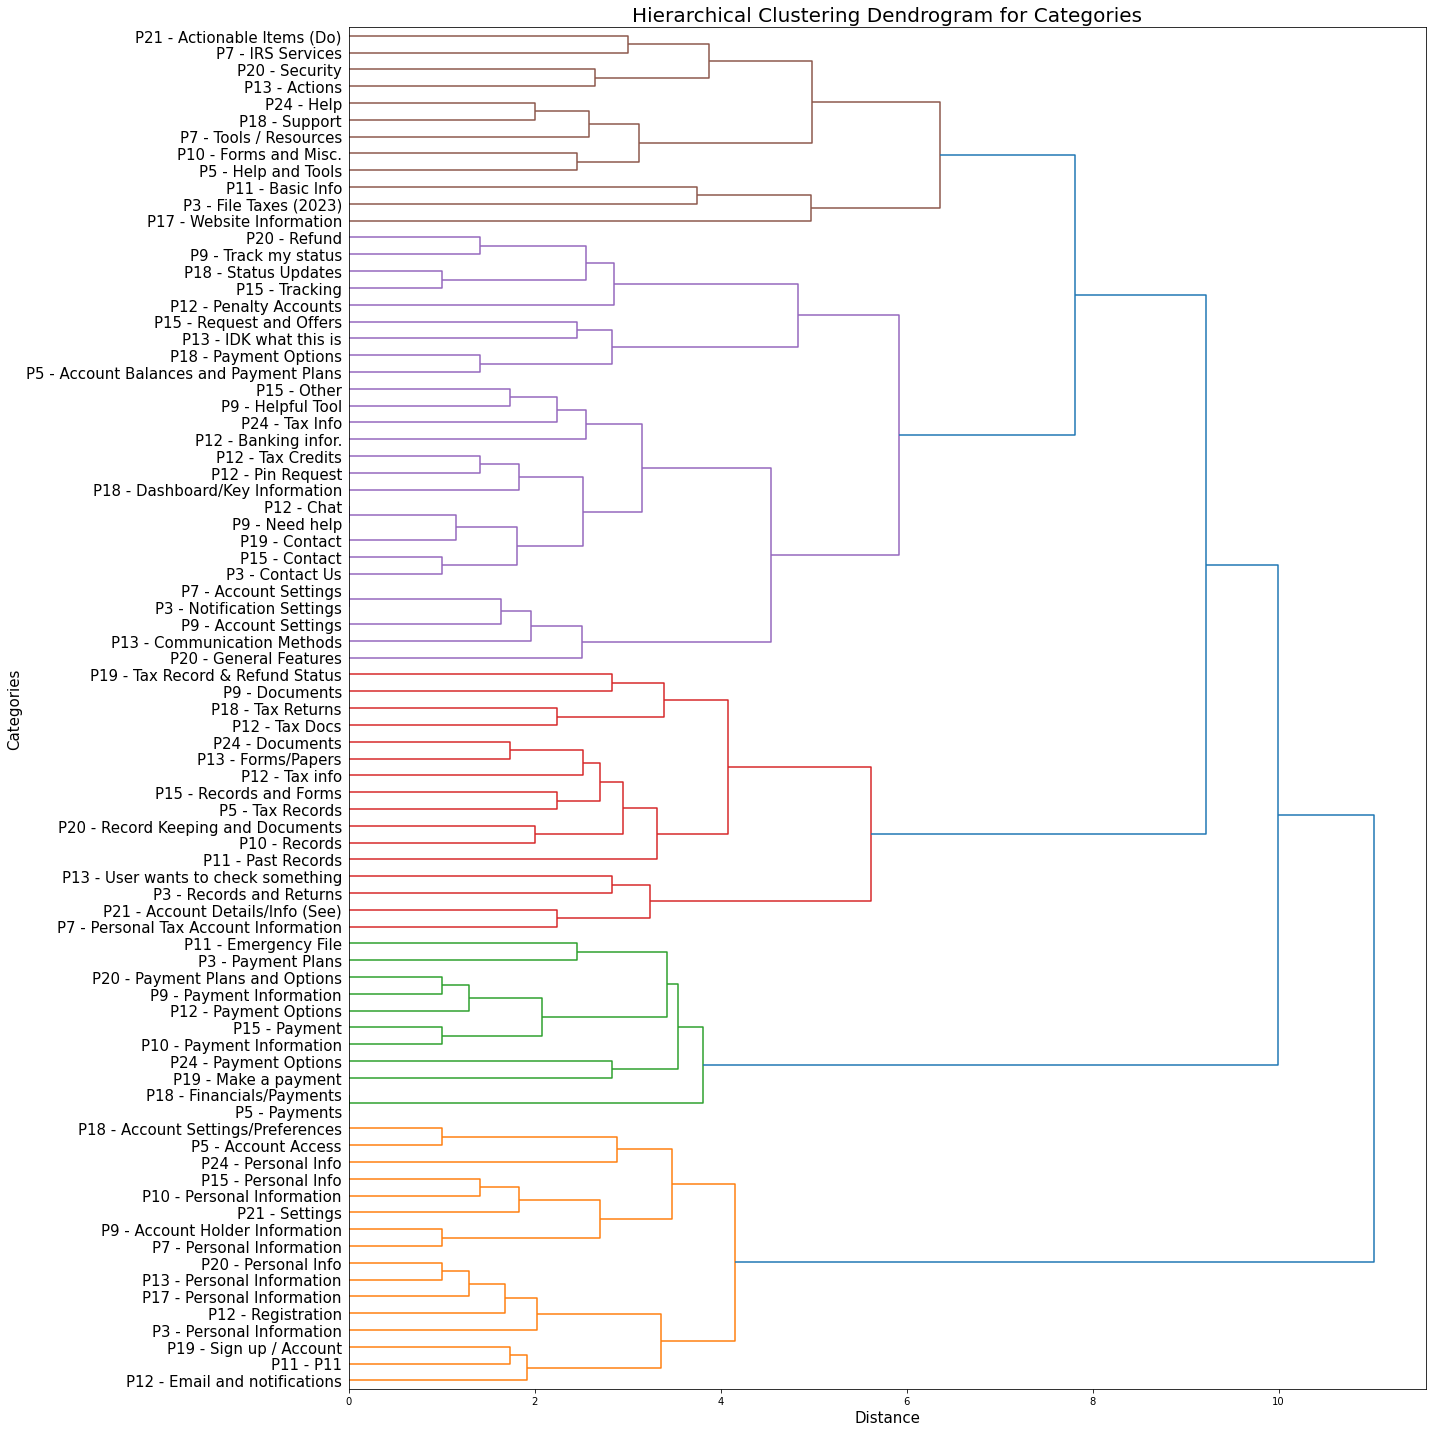

In [82]:
# Create labels from categories
labels = list(df['Categories'])

# 5 clusters with default threshold : 0.7 * max(Z[:, 2])

plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram for Categories',fontsize=20)
plt.xlabel('Distance',fontsize = 15)
plt.ylabel('Categories',fontsize = 15)

# Rotates the x axis labels
# font size for the x axis label
dn = hierarchy.dendrogram(linkage_matrix,labels=labels,leaf_font_size=15,orientation='right')

plt.xlim()

plt.tight_layout()
plt.show();

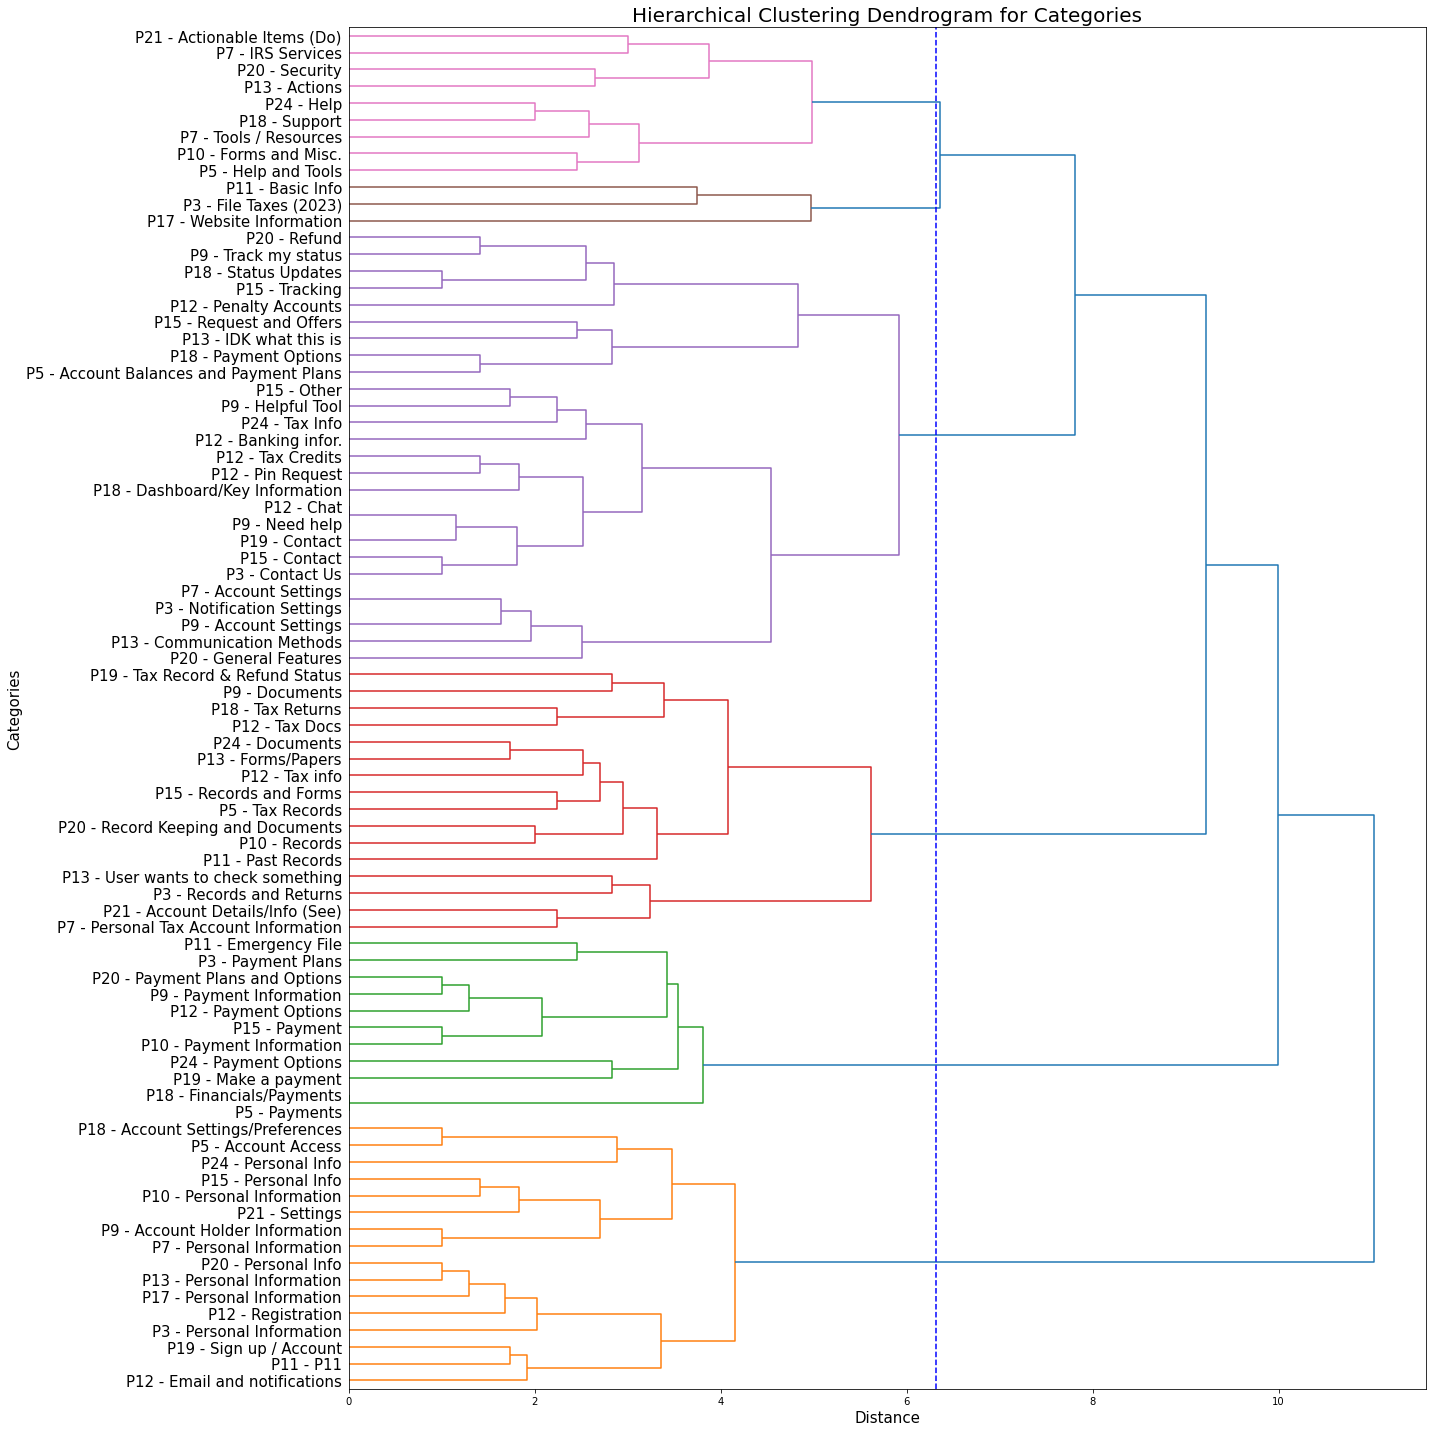

In [37]:
# Create labels from categories
labels = list(df['Categories'])

# 6 clusters with 6.32 threshold 

plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram for Categories',fontsize=20)
plt.xlabel('Distance',fontsize = 15)
plt.ylabel('Categories',fontsize = 15)

# Rotates the x axis labels
# font size for the x axis label
dn = hierarchy.dendrogram(linkage_matrix,labels=labels,color_threshold = 6.32,leaf_font_size=15,orientation='right')

# Set the line of threshold
plt.axvline(x=6.32,color='b',linestyle = '--')
plt.xlim()

plt.tight_layout()
plt.show();

In [38]:
# Create models
model_5 = AgglomerativeClustering(n_clusters=5)
model_6 = AgglomerativeClustering(n_clusters=6)
model_7 = AgglomerativeClustering(n_clusters=7)
model_8 = AgglomerativeClustering(n_clusters=8)

In [39]:
cluster_labels_5 = model_5.fit_predict(cdf)
cluster_labels_6 = model_6.fit_predict(cdf)
cluster_labels_7 = model_7.fit_predict(cdf)
cluster_labels_8 = model_8.fit_predict(cdf)

In [40]:
# cluster_5 : 0,1,2,3,4
cluster_labels_5

array([1, 3, 1, 2, 4, 0, 3, 1, 2, 4, 0, 3, 0, 4, 1, 0, 3, 2, 1, 1, 4, 1,
       1, 3, 2, 4, 0, 3, 0, 2, 4, 3, 3, 1, 4, 2, 4, 1, 1, 1, 1, 1, 3, 0,
       1, 4, 4, 1, 2, 3, 1, 1, 4, 1, 3, 0, 3, 1, 1, 1, 4, 2, 0, 3, 4, 1,
       2, 3, 4, 1, 0, 2, 1, 3, 4, 0, 3, 2, 4, 0, 1])

In [41]:
# cluster_6 : 0,1,2,3,4,5
cluster_labels_6

array([0, 3, 0, 5, 1, 2, 3, 0, 5, 1, 4, 3, 4, 1, 0, 4, 3, 5, 0, 0, 1, 0,
       0, 3, 5, 1, 4, 3, 2, 5, 1, 3, 3, 0, 1, 5, 1, 0, 0, 0, 0, 0, 3, 4,
       0, 1, 1, 0, 5, 3, 0, 0, 1, 0, 3, 2, 3, 0, 0, 0, 1, 5, 4, 3, 1, 0,
       5, 3, 1, 0, 4, 5, 0, 3, 1, 4, 3, 5, 1, 4, 0])

In [42]:
# cluster_6 : 0,1,2,3,4,5,6
cluster_labels_7

array([6, 3, 6, 5, 0, 2, 3, 4, 5, 0, 1, 3, 1, 0, 6, 1, 3, 5, 6, 6, 0, 4,
       6, 3, 5, 0, 1, 3, 2, 5, 0, 3, 3, 6, 0, 5, 0, 4, 6, 6, 6, 4, 3, 1,
       6, 0, 0, 4, 5, 3, 4, 6, 0, 6, 3, 2, 3, 6, 4, 4, 0, 5, 1, 3, 0, 6,
       5, 3, 0, 6, 1, 5, 4, 3, 0, 1, 3, 5, 0, 1, 6])

In [43]:
# cluster_6 : 0,1,2,3,4,5,6,7
cluster_labels_8

array([6, 3, 6, 5, 7, 2, 3, 1, 5, 4, 0, 3, 0, 7, 6, 0, 3, 5, 6, 6, 4, 1,
       6, 3, 5, 4, 0, 3, 2, 5, 4, 3, 3, 6, 4, 5, 4, 1, 6, 6, 6, 1, 3, 0,
       6, 7, 4, 1, 5, 3, 1, 6, 4, 6, 3, 2, 3, 6, 1, 1, 4, 5, 0, 3, 4, 6,
       5, 3, 4, 6, 0, 5, 1, 3, 7, 0, 3, 5, 4, 0, 6])

In [44]:
# Assign clusters to original dataframe based on different number of clusters
df['cluster_5'] = cluster_labels_5
df['cluster_6'] = cluster_labels_6
df['cluster_7'] = cluster_labels_7
df['cluster_8'] = cluster_labels_8
df

,Categories,Person,Total cards,Tax Balance Details,Payment activity,Scheduled payments,Processed payments,"Make, Schedule, & Cancel a payment",Payment Plan Options,Notices and Letters,Tax Account Notifications,Power of attorney authorization requests,Tax information authorization requests,Tax return transcript authorization requests,Tax records,Tax Return Transcript,Your Name,Your Home Address,Email and password,Email notifications,Paperless settings,Secure two-way messaging,Live chat with IRS,Save multiple bank accounts,Validate bank account information,Update my address (foreign & domestic),View my audit status,Lien payoff calculator,Tax Refund Tracking,Revise payment plans,Pre-assessed agreements,Pending installment agreement,Offer In Compromise (OIC) eligibility check,Offer In Compromise (OIC) payment options,Cancelled and returned payments,Track amended return,Request Identity Protection (IP) pin,Request Penalty abatement,Tax Withholding compliance self-correction tool,Self-report tax fraud,IRS forms,Apply for Eligible Tax Credits,See all submitted tax docs,cluster_5,cluster_6,cluster_7,cluster_8
0,P3 - Contact Us,P3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,6,6
1,P3 - Personal Information,P3,6,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,3,3,3
2,P3 - Notification Settings,P3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,6
3,P3 - Payment Plans,P3,9,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,2,5,5,5
4,P3 - Records and Returns,P3,8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4,1,0,7
5,P3 - File Taxes (2023),P3,11,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,2,2,2
6,P5 - Account Access,P5,8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,3,3,3
7,P5 - Account Balances and Payment Plans,P5,8,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,4,1
8,P5 - Payments,P5,7,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,5,5,5
9,P5 - Tax Records,P5,8,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,4,1,0,4


In [45]:
# Dataframe clean up
# Drop unnecessary columns
# groupby only sum up numeric columns
cluster_5_cards = df.groupby(by ='cluster_5').sum().drop(['Total cards','cluster_6','cluster_7','cluster_8'],axis=1)
cluster_6_cards = df.groupby(by ='cluster_6').sum().drop(['Total cards','cluster_5','cluster_7','cluster_8'],axis=1)
cluster_7_cards = df.groupby(by ='cluster_7').sum().drop(['Total cards','cluster_5','cluster_6','cluster_8'],axis=1)
cluster_8_cards = df.groupby(by ='cluster_8').sum().drop(['Total cards','cluster_5','cluster_6','cluster_7'],axis=1)

In [46]:
cluster_5_cards

,Tax Balance Details,Payment activity,Scheduled payments,Processed payments,"Make, Schedule, & Cancel a payment",Payment Plan Options,Notices and Letters,Tax Account Notifications,Power of attorney authorization requests,Tax information authorization requests,Tax return transcript authorization requests,Tax records,Tax Return Transcript,Your Name,Your Home Address,Email and password,Email notifications,Paperless settings,Secure two-way messaging,Live chat with IRS,Save multiple bank accounts,Validate bank account information,Update my address (foreign & domestic),View my audit status,Lien payoff calculator,Tax Refund Tracking,Revise payment plans,Pre-assessed agreements,Pending installment agreement,Offer In Compromise (OIC) eligibility check,Offer In Compromise (OIC) payment options,Cancelled and returned payments,Track amended return,Request Identity Protection (IP) pin,Request Penalty abatement,Tax Withholding compliance self-correction tool,Self-report tax fraud,IRS forms,Apply for Eligible Tax Credits,See all submitted tax docs
cluster_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3,1,2,2,3,4,2,2,7,6,9,1,3,0,0,1,1,2,8,8,3,6,2,2,5,4,4,2,3,7,3,1,2,5,7,9,8,8,7,1
1,2,0,0,0,0,2,2,7,3,1,2,0,0,0,0,0,5,5,4,7,2,1,0,3,4,5,3,4,5,6,4,0,5,2,6,5,3,0,3,0
2,1,8,10,9,11,8,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,3,0,0,6,0,7,1,2,2,8,10,0,1,2,0,1,0,0,0
3,0,1,0,0,0,0,3,2,3,0,0,0,0,15,15,14,9,7,3,0,5,5,12,2,0,0,1,0,0,0,0,1,0,7,0,0,0,0,1,0
4,9,5,3,4,1,1,8,4,2,7,4,14,12,0,0,0,0,0,0,0,1,0,1,8,0,6,0,8,5,0,0,3,8,0,0,1,3,7,4,14


In [47]:
# 5 clusters with 40 cards 
cluster_5_cards.shape

(5, 40)

In [48]:
# Save categories names for each cluster
cat_5 = df.groupby(by ='cluster_5',as_index=False).agg({'Categories': ' , '.join})
cat_6 = df.groupby(by ='cluster_6',as_index=False).agg({'Categories': ' , '.join})
cat_7 = df.groupby(by ='cluster_7',as_index=False).agg({'Categories': ' , '.join})
cat_8 = df.groupby(by ='cluster_8',as_index=False).agg({'Categories': ' , '.join})

In [49]:
# Check categories names
cat_5

,cluster_5,Categories
0,0,"P3 - File Taxes (2023) , P5 - Help and Tools , P7 - IRS Services , P7 - Tools / Resources , P10 - Forms and Misc. , P11 - Basic Info , P13 - Actions , P17 - Website Information , P18 - Support , P20 - Security , P21 - Actionable Items (Do) , P24 - Help"
1,1,"P3 - Contact Us , P3 - Notification Settings , P5 - Account Balances and Payment Plans , P7 - Account Settings , P9 - Helpful Tool , P9 - Account Settings , P9 - Track my status , P9 - Need help , P12 - Banking infor. , P12 - Penalty Accounts , P12 - Pin Request , P12 - Tax Credits , P12 - Chat , P13 - IDK what this is , P13 - Communication Methods , P15 - Tracking , P15 - Request and Offers , P15 - Contact , P15 - Other , P18 - Dashboard/Key Information , P18 - Status Updates , P18 - Payment Options , P19 - Contact , P20 - General Features , P20 - Refund , P24 - Tax Info"
2,2,"P3 - Payment Plans , P5 - Payments , P9 - Payment Information , P10 - Payment Information , P11 - Emergency File , P12 - Payment Options , P15 - Payment , P18 - Financials/Payments , P19 - Make a payment , P20 - Payment Plans and Options , P24 - Payment Options"
3,3,"P3 - Personal Information , P5 - Account Access , P7 - Personal Information , P9 - Account Holder Information , P10 - Personal Information , P11 - P11 , P12 - Registration , P12 - Email and notifications , P13 - Personal Information , P15 - Personal Info , P17 - Personal Information , P18 - Account Settings/Preferences , P19 - Sign up / Account , P20 - Personal Info , P21 - Settings , P24 - Personal Info"
4,4,"P3 - Records and Returns , P5 - Tax Records , P7 - Personal Tax Account Information , P9 - Documents , P10 - Records , P11 - Past Records , P12 - Tax info , P12 - Tax Docs , P13 - User wants to check something , P13 - Forms/Papers , P15 - Records and Forms , P18 - Tax Returns , P19 - Tax Record & Refund Status , P20 - Record Keeping and Documents , P21 - Account Details/Info (See) , P24 - Documents"


In [50]:
# Assign cluster names with categories info above
# Names of cluster 2,3,4 are more consistant
cat_5 ={0:'Forms and Tools',1:'Account and Bank Settings',2:'Payment and Payment Plans',3:'Personal Information',4:'Tax Records and Documents'}

In [51]:
# Function to auto display result of each model
# df : pass in cluster result
# cat : cluster names changed
def cluster_analysis(df,cat,num):
    
    columns = list(np.arange(0,num))
    
    # Switch rows and columns(cards to rows and clusters number to column)
    df = df.transpose()
    # Return the max value of each row
    # This shows the highest vote for each card
    df['Max_value'] = df[columns].max(axis=1)
    # Return the max value's cluster number
    # This shows which cluster the highest vote belong to
    df['Max_cluster'] = df[columns].idxmax(axis=1)
    # Assign cluster name 
    df['Cluster_name'] = df['Max_cluster'].map(cat)
    # In total, there are 15 people, so each card will be voted for 15 times
    # Max values/highest vote for each card/15 total votes = Agreement level 
    df['Agreement Level (%)'] = np.round((df['Max_value']/15)*100,2)
    
    # Show df
    return(df)   

In [52]:
# Sort cards by cluster_name first, then sort by Agreement Level
cluster_5_cards = cluster_analysis(cluster_5_cards,cat_5,5).sort_values(['Cluster_name','Agreement Level (%)'],ascending = [True,False])

In [53]:
cluster_5_cards

cluster_5,0,1,2,3,4,Max_value,Max_cluster,Cluster_name,Agreement Level (%)
Tax Account Notifications,2,7,0,2,4,7,1,Account and Bank Settings,46.67
Pending installment agreement,3,5,2,0,5,5,1,Account and Bank Settings,33.33
Tax return transcript authorization requests,9,2,0,0,4,9,0,Forms and Tools,60.00
Tax Withholding compliance self-correction tool,9,5,0,0,1,9,0,Forms and Tools,60.00
Secure two-way messaging,8,4,0,3,0,8,0,Forms and Tools,53.33
Live chat with IRS,8,7,0,0,0,8,0,Forms and Tools,53.33
Self-report tax fraud,8,3,1,0,3,8,0,Forms and Tools,53.33
IRS forms,8,0,0,0,7,8,0,Forms and Tools,53.33
Power of attorney authorization requests,7,3,0,3,2,7,0,Forms and Tools,46.67
Offer In Compromise (OIC) eligibility check,7,6,2,0,0,7,0,Forms and Tools,46.67


In [54]:
# Function to see the mean of agreement level for each cluster in a model
def cluster_agreemnt_level(df):
    
    cluster_AGL_mean = df[['Cluster_name','Agreement Level (%)']].groupby('Cluster_name').mean().sort_values('Agreement Level (%)',ascending=False)
    cluster_AGL_mean['Agreement Level (%)']= np.round(cluster_AGL_mean['Agreement Level (%)'],2)
    return cluster_AGL_mean

In [55]:
cluster_5_AGL = cluster_agreemnt_level(cluster_5_cards)
cluster_5_AGL

cluster_5,Agreement Level (%)
Cluster_name,
Personal Information,70.00
Tax Records and Documents,62.66
Payment and Payment Plans,57.04
Forms and Tools,50.91
Account and Bank Settings,40.00


In [56]:
cat_6

,cluster_6,Categories
0,0,"P3 - Contact Us , P3 - Notification Settings , P5 - Account Balances and Payment Plans , P7 - Account Settings , P9 - Helpful Tool , P9 - Account Settings , P9 - Track my status , P9 - Need help , P12 - Banking infor. , P12 - Penalty Accounts , P12 - Pin Request , P12 - Tax Credits , P12 - Chat , P13 - IDK what this is , P13 - Communication Methods , P15 - Tracking , P15 - Request and Offers , P15 - Contact , P15 - Other , P18 - Dashboard/Key Information , P18 - Status Updates , P18 - Payment Options , P19 - Contact , P20 - General Features , P20 - Refund , P24 - Tax Info"
1,1,"P3 - Records and Returns , P5 - Tax Records , P7 - Personal Tax Account Information , P9 - Documents , P10 - Records , P11 - Past Records , P12 - Tax info , P12 - Tax Docs , P13 - User wants to check something , P13 - Forms/Papers , P15 - Records and Forms , P18 - Tax Returns , P19 - Tax Record & Refund Status , P20 - Record Keeping and Documents , P21 - Account Details/Info (See) , P24 - Documents"
2,2,"P3 - File Taxes (2023) , P11 - Basic Info , P17 - Website Information"
3,3,"P3 - Personal Information , P5 - Account Access , P7 - Personal Information , P9 - Account Holder Information , P10 - Personal Information , P11 - P11 , P12 - Registration , P12 - Email and notifications , P13 - Personal Information , P15 - Personal Info , P17 - Personal Information , P18 - Account Settings/Preferences , P19 - Sign up / Account , P20 - Personal Info , P21 - Settings , P24 - Personal Info"
4,4,"P5 - Help and Tools , P7 - IRS Services , P7 - Tools / Resources , P10 - Forms and Misc. , P13 - Actions , P18 - Support , P20 - Security , P21 - Actionable Items (Do) , P24 - Help"
5,5,"P3 - Payment Plans , P5 - Payments , P9 - Payment Information , P10 - Payment Information , P11 - Emergency File , P12 - Payment Options , P15 - Payment , P18 - Financials/Payments , P19 - Make a payment , P20 - Payment Plans and Options , P24 - Payment Options"


In [57]:
# Assign cluster names with categories info above
cat_6 ={0:'Notifications and Contact',1:'Tax Records and Documents',2:'Misc',3:'Personal Information',4:'Tools and Help',5:'Payment and Payment plans'}

In [58]:
# Sort cards by cluster_name first, then sort by Agreement Level
cluster_6_cards = cluster_analysis(cluster_6_cards,cat_6,6).sort_values(['Cluster_name','Agreement Level (%)'],ascending = [True,False])

In [59]:
# We can see that although we create 6 clusters, the result show only 5 clusters
# Cluster 2(Misc) does not provide clear division from other 5 clusters
cluster_6_AGL = cluster_agreemnt_level(cluster_6_cards)
cluster_6_AGL

cluster_6,Agreement Level (%)
Cluster_name,
Personal Information,65.93
Tax Records and Documents,58.33
Payment and Payment plans,57.04
Notifications and Contact,41.33
Tools and Help,40.00


In [60]:
cat_7 

,cluster_7,Categories
0,0,"P3 - Records and Returns , P5 - Tax Records , P7 - Personal Tax Account Information , P9 - Documents , P10 - Records , P11 - Past Records , P12 - Tax info , P12 - Tax Docs , P13 - User wants to check something , P13 - Forms/Papers , P15 - Records and Forms , P18 - Tax Returns , P19 - Tax Record & Refund Status , P20 - Record Keeping and Documents , P21 - Account Details/Info (See) , P24 - Documents"
1,1,"P5 - Help and Tools , P7 - IRS Services , P7 - Tools / Resources , P10 - Forms and Misc. , P13 - Actions , P18 - Support , P20 - Security , P21 - Actionable Items (Do) , P24 - Help"
2,2,"P3 - File Taxes (2023) , P11 - Basic Info , P17 - Website Information"
3,3,"P3 - Personal Information , P5 - Account Access , P7 - Personal Information , P9 - Account Holder Information , P10 - Personal Information , P11 - P11 , P12 - Registration , P12 - Email and notifications , P13 - Personal Information , P15 - Personal Info , P17 - Personal Information , P18 - Account Settings/Preferences , P19 - Sign up / Account , P20 - Personal Info , P21 - Settings , P24 - Personal Info"
4,4,"P5 - Account Balances and Payment Plans , P9 - Track my status , P12 - Penalty Accounts , P13 - IDK what this is , P15 - Tracking , P15 - Request and Offers , P18 - Status Updates , P18 - Payment Options , P20 - Refund"
5,5,"P3 - Payment Plans , P5 - Payments , P9 - Payment Information , P10 - Payment Information , P11 - Emergency File , P12 - Payment Options , P15 - Payment , P18 - Financials/Payments , P19 - Make a payment , P20 - Payment Plans and Options , P24 - Payment Options"
6,6,"P3 - Contact Us , P3 - Notification Settings , P7 - Account Settings , P9 - Helpful Tool , P9 - Account Settings , P9 - Need help , P12 - Banking infor. , P12 - Pin Request , P12 - Tax Credits , P12 - Chat , P13 - Communication Methods , P15 - Contact , P15 - Other , P18 - Dashboard/Key Information , P19 - Contact , P20 - General Features , P24 - Tax Info"


In [61]:
# Assign cluster names with categories info above
cat_7 ={0:'Tax Records and Documents',1:'Tools and Help',2:'Misc',3:'Personal Information',4:'Payment Plans',5:'Payment',6:'Contact and Notifications'}

In [62]:
# Sort cards by cluster_name first, then sort by Agreement Level
cluster_7_cards = cluster_analysis(cluster_7_cards,cat_7,7).sort_values(['Cluster_name','Agreement Level (%)'],ascending = [True,False])


In [63]:
# We can see that although we create 6 clusters, the result show only 6 clusters
# Cluster 2(Misc) does not provide clear division from other 6 clusters
cluster_7_AGL = cluster_agreemnt_level(cluster_7_cards)
cluster_7_AGL

cluster_7,Agreement Level (%)
Cluster_name,
Personal Information,65.93
Payment,57.04
Tax Records and Documents,56.41
Contact and Notifications,46.67
Payment Plans,40.00
Tools and Help,40.00


In [64]:
cat_8

,cluster_8,Categories
0,0,"P5 - Help and Tools , P7 - IRS Services , P7 - Tools / Resources , P10 - Forms and Misc. , P13 - Actions , P18 - Support , P20 - Security , P21 - Actionable Items (Do) , P24 - Help"
1,1,"P5 - Account Balances and Payment Plans , P9 - Track my status , P12 - Penalty Accounts , P13 - IDK what this is , P15 - Tracking , P15 - Request and Offers , P18 - Status Updates , P18 - Payment Options , P20 - Refund"
2,2,"P3 - File Taxes (2023) , P11 - Basic Info , P17 - Website Information"
3,3,"P3 - Personal Information , P5 - Account Access , P7 - Personal Information , P9 - Account Holder Information , P10 - Personal Information , P11 - P11 , P12 - Registration , P12 - Email and notifications , P13 - Personal Information , P15 - Personal Info , P17 - Personal Information , P18 - Account Settings/Preferences , P19 - Sign up / Account , P20 - Personal Info , P21 - Settings , P24 - Personal Info"
4,4,"P5 - Tax Records , P9 - Documents , P10 - Records , P11 - Past Records , P12 - Tax info , P12 - Tax Docs , P13 - Forms/Papers , P15 - Records and Forms , P18 - Tax Returns , P19 - Tax Record & Refund Status , P20 - Record Keeping and Documents , P24 - Documents"
5,5,"P3 - Payment Plans , P5 - Payments , P9 - Payment Information , P10 - Payment Information , P11 - Emergency File , P12 - Payment Options , P15 - Payment , P18 - Financials/Payments , P19 - Make a payment , P20 - Payment Plans and Options , P24 - Payment Options"
6,6,"P3 - Contact Us , P3 - Notification Settings , P7 - Account Settings , P9 - Helpful Tool , P9 - Account Settings , P9 - Need help , P12 - Banking infor. , P12 - Pin Request , P12 - Tax Credits , P12 - Chat , P13 - Communication Methods , P15 - Contact , P15 - Other , P18 - Dashboard/Key Information , P19 - Contact , P20 - General Features , P24 - Tax Info"
7,7,"P3 - Records and Returns , P7 - Personal Tax Account Information , P13 - User wants to check something , P21 - Account Details/Info (See)"


In [65]:
# Assign cluster names with categories info above
cat_8 ={0:'Tools and Help',1:'Payment Options',2:'Misc',3:'Personal Information',4:'Tax Records and Documents',5:'Payment',6:'Contact and Notifications',7:'Misc2'}

In [66]:
# Sort cards by cluster_name first, then sort by Agreement Level
cluster_8_cards = cluster_analysis(cluster_8_cards,cat_8,8).sort_values(['Cluster_name','Agreement Level (%)'],ascending = [True,False])

In [67]:
# We can see that although we create 8 clusters, the result show only 6 clusters
# Cluster 2(Misc) and 7(Misc2) don't provide clear division from other 6 clusters
# Then we are sure the maximum num of clusters should be no more than 6
cluster_8_AGL = cluster_agreemnt_level(cluster_8_cards)
cluster_8_AGL

cluster_8,Agreement Level (%)
Cluster_name,
Personal Information,65.93
Payment,57.04
Tax Records and Documents,50.83
Contact and Notifications,46.67
Tools and Help,36.19
Payment Options,34.67


### Model Determination and Cluster Analysis
**Clusters determination from Quantitative method:**
- Personal Information
- Tax Records and Documents
- Payment and Payment Plans
- Misc : Account and Bank Settings + Forms and Tools

Cards in Misc cluster needs to be manually assigned and should be aligned with qualitative research. 

In [68]:
# Display multiple dataframes side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [69]:
# Check mean agreement level from all models side by side
display_side_by_side(cluster_5_AGL,cluster_6_AGL,cluster_7_AGL,cluster_8_AGL,titles=cycle(['5 clusters','6 clusters','7 clusters','8 clusters']))

cluster_5,Agreement Level (%)
Cluster_name,
Personal Information,70.00
Tax Records and Documents,62.66
Payment and Payment Plans,57.04
Forms and Tools,50.91
Account and Bank Settings,40.00
cluster_6,Agreement Level (%)
Cluster_name,
Personal Information,65.93
Tax Records and Documents,58.33


Determine Cluster Model:
Based on the mean of agreement level of different cluster models(5,6,7,8 clusters), 
5 clusters model is chosen since it has higher mean agreement level overall and only one cluster's mean agreement level is under 50%. We should investigate further on "Forms and Tools" and "Account and Bank Settings", whose mean agreement level are 51% and 40%.


In [70]:
# Look at the cards in "Account and Bank Settings" and "Forms and Tools"
# These 2 clusters should be in a Misc cluster 
cluster_5_cards

cluster_5,0,1,2,3,4,Max_value,Max_cluster,Cluster_name,Agreement Level (%)
Tax Account Notifications,2,7,0,2,4,7,1,Account and Bank Settings,46.67
Pending installment agreement,3,5,2,0,5,5,1,Account and Bank Settings,33.33
Tax return transcript authorization requests,9,2,0,0,4,9,0,Forms and Tools,60.00
Tax Withholding compliance self-correction tool,9,5,0,0,1,9,0,Forms and Tools,60.00
Secure two-way messaging,8,4,0,3,0,8,0,Forms and Tools,53.33
Live chat with IRS,8,7,0,0,0,8,0,Forms and Tools,53.33
Self-report tax fraud,8,3,1,0,3,8,0,Forms and Tools,53.33
IRS forms,8,0,0,0,7,8,0,Forms and Tools,53.33
Power of attorney authorization requests,7,3,0,3,2,7,0,Forms and Tools,46.67
Offer In Compromise (OIC) eligibility check,7,6,2,0,0,7,0,Forms and Tools,46.67


In [71]:
fin_cat = {0:'Misc',1:'Misc',2:'Payment and Payment Plans',3:'Personal Information',4:'Tax Records and Documents'}

In [72]:
final = cluster_5_cards.copy()
final['Cluster_name'] = final['Max_cluster'].map(fin_cat)
final

cluster_5,0,1,2,3,4,Max_value,Max_cluster,Cluster_name,Agreement Level (%)
Tax Account Notifications,2,7,0,2,4,7,1,Misc,46.67
Pending installment agreement,3,5,2,0,5,5,1,Misc,33.33
Tax return transcript authorization requests,9,2,0,0,4,9,0,Misc,60.00
Tax Withholding compliance self-correction tool,9,5,0,0,1,9,0,Misc,60.00
Secure two-way messaging,8,4,0,3,0,8,0,Misc,53.33
Live chat with IRS,8,7,0,0,0,8,0,Misc,53.33
Self-report tax fraud,8,3,1,0,3,8,0,Misc,53.33
IRS forms,8,0,0,0,7,8,0,Misc,53.33
Power of attorney authorization requests,7,3,0,3,2,7,0,Misc,46.67
Offer In Compromise (OIC) eligibility check,7,6,2,0,0,7,0,Misc,46.67


#### Number of cards in each cluster

In [73]:
# See how many cards each cluster contains
final['Cluster_name'].value_counts()

Misc                         13
Tax Records and Documents    10
Payment and Payment Plans     9
Personal Information          8
Name: Cluster_name, dtype: int64

#### Cards should be manually assigned

In [74]:
# Show cards in Misc cluster and all cards with agreement level < 50 
f1 = final[(final['Agreement Level (%)']<50)& (final['Cluster_name'] != 'Misc')]
f2 = final[final['Cluster_name'] == 'Misc']
filtered = pd.concat([f1, f2], ignore_index=False, sort=False).sort_values(['Cluster_name','Agreement Level (%)'],ascending=[True,False])

In [75]:
filtered

cluster_5,0,1,2,3,4,Max_value,Max_cluster,Cluster_name,Agreement Level (%)
Tax return transcript authorization requests,9,2,0,0,4,9,0,Misc,60.00
Tax Withholding compliance self-correction tool,9,5,0,0,1,9,0,Misc,60.00
Secure two-way messaging,8,4,0,3,0,8,0,Misc,53.33
Live chat with IRS,8,7,0,0,0,8,0,Misc,53.33
Self-report tax fraud,8,3,1,0,3,8,0,Misc,53.33
IRS forms,8,0,0,0,7,8,0,Misc,53.33
Tax Account Notifications,2,7,0,2,4,7,1,Misc,46.67
Power of attorney authorization requests,7,3,0,3,2,7,0,Misc,46.67
Offer In Compromise (OIC) eligibility check,7,6,2,0,0,7,0,Misc,46.67
Request Penalty abatement,7,6,2,0,0,7,0,Misc,46.67


In [76]:
settled = final[(final['Agreement Level (%)']>50)& (final['Cluster_name'] != 'Misc')]
settled

cluster_5,0,1,2,3,4,Max_value,Max_cluster,Cluster_name,Agreement Level (%)
"Make, Schedule, & Cancel a payment",3,0,11,0,1,11,2,Payment and Payment Plans,73.33
Scheduled payments,2,0,10,0,3,10,2,Payment and Payment Plans,66.67
Cancelled and returned payments,1,0,10,1,3,10,2,Payment and Payment Plans,66.67
Processed payments,2,0,9,0,4,9,2,Payment and Payment Plans,60.00
Payment activity,1,0,8,1,5,8,2,Payment and Payment Plans,53.33
Payment Plan Options,4,2,8,0,1,8,2,Payment and Payment Plans,53.33
Offer In Compromise (OIC) payment options,3,4,8,0,0,8,2,Payment and Payment Plans,53.33
Your Name,0,0,0,15,0,15,3,Personal Information,100.00
Your Home Address,0,0,0,15,0,15,3,Personal Information,100.00
Email and password,1,0,0,14,0,14,3,Personal Information,93.33


In [77]:
len(settled)

20

In [78]:
len(filtered)

20